# Single file QC & multi file TIC check

Using pyOpenMS. Input file in mzML.

This notebook can be saved as a report in HTML or PDF.

This includes:
plots of TIC, chromatograms and mass distribution of internal standards (spike-in standards and 'house keeping' metabolites).

**plot multifile TIC**

To start this notebook:

Go to the docker folder of `pyopenms-qc` and run `docker compose up`

Minghao Gong, 2022-10-18

In [1]:
# install pyopenms if needed
import os
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
from pyopenms import *

sys.path.append('./pyutils')
from SingleFileQC import *

Determination of memory status is not supported on this 
 platform, measuring for memoryleaks will never fail


In [2]:
# lipid mix internal controls
lipidIS_df = pd.read_csv("../../input/lipidMix_internal_standards/adducts_lipidMix_internalStandard.csv")

In [3]:
lipidIS_df.head()

,Ion_Name,Compound_Name,MW,Exact_Mass,Chemical_Formula,Concentration_ugmL,cal_exact_mass,MpH,MmH
0,15:0-18:1(d7) PC,15:0-18:1(d7) PC,753.11,752.61,C41H73D7NO8P,150.6,752.606092,753.613368,751.598816
1,15:0-18:1(d7) PE,15:0-18:1(d7) PE,711.03,710.56,C38H67D7NO8P,5.3,710.559142,711.566418,709.551866
2,15:0-18:1(d7) PS,15:0-18:1(d7) PS (Na Salt),777.02,776.53,C39H66D7NNaO10P,3.9,754.548971,755.556247,753.541695
3,15:0-18:1(d7) PG,15:0-18:1(d7) PG (Na Salt),764.02,763.54,C39H67D7NaO10P,26.7,741.553722,742.560998,740.546446
4,15:0-18:1(d7) PI,15:0-18:1(d7) PI (NH4 Salt),847.13,846.60,C42H75D7NO13P,8.5,846.596315,847.603591,845.589039


In [4]:
def tabular2spikeins(df = lipidIS_df,
                     name = 'Ion_Name',
                     adduct_colname = 'MpH'):
    spikeins = []
    for i,row in df.iterrows():
        spikeins.append((row[name],row[adduct_colname],0))
    return(spikeins)

In [5]:
spikeins = tabular2spikeins(lipidIS_df,'Ion_Name','MmH')
other_controls = []

In [6]:
spikeins

[('15:0-18:1(d7) PC', 751.59881553323, 0),
 ('15:0-18:1(d7) PE', 709.5518655332299, 0),
 ('15:0-18:1(d7) PS', 753.54169453323, 0),
 ('15:0-18:1(d7) PG', 740.54644553323, 0),
 ('15:0-18:1(d7) PI', 845.58903853323, 0),
 ('15:0-18:1(d7) PA', 666.50966653323, 0),
 ('18:1(d7) Lyso PC', 527.38479953323, 0),
 ('18:1(d7) Lyso PE', 485.33784953323, 0),
 ('18:1(d7) Chol Ester', 656.63684153323, 0),
 ('18:1(d7) MAG', 362.32931953323, 0),
 ('15:0-18:1(d7) DAG', 586.54333553323, 0),
 ('15:0-18:1(d7)-15:0 TAG', 810.75735153323, 0),
 ('d18:1-18:1(d9) SM', 736.63243953323, 0),
 ('Cholesterol (d7)', 392.39152653323, 0)]

------

# Single File QC

In [7]:
# file = '../../input/mzMLbyMethods_pel/HILICneg_FS/pel_batch01_MT_20220910_001.mzML'

# # step wise

# exp = MSExperiment()
# MzMLFile().load(file, exp)

# full_trio_list = extract_trio(exp)

# plot_target_mzchrompeaks(full_trio_list, '15N-13C5-methionine', 156.0721)

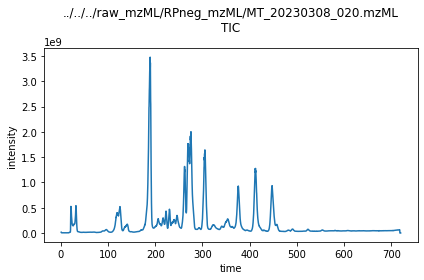

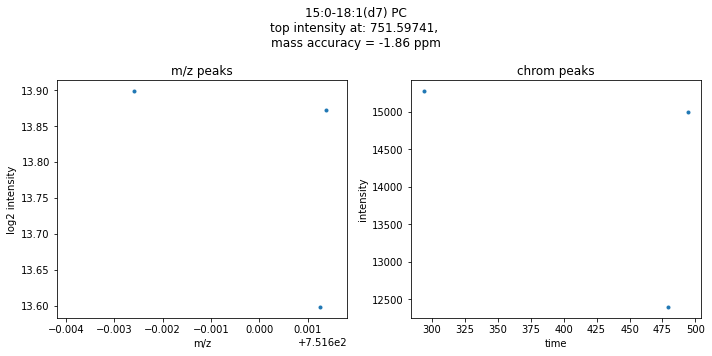

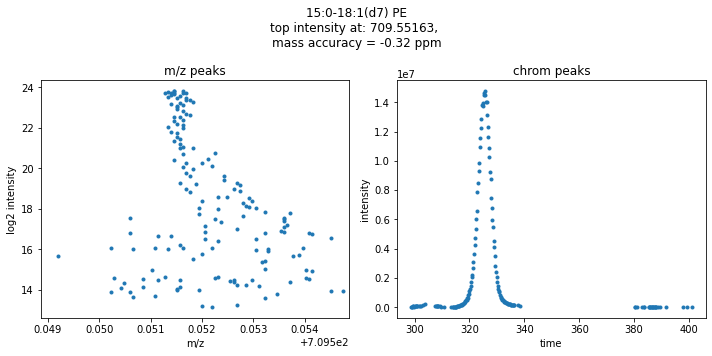

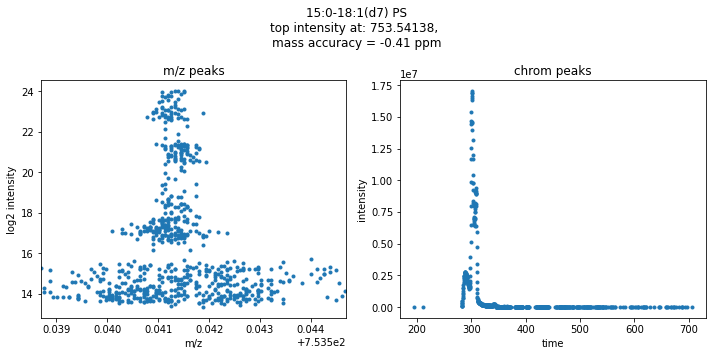

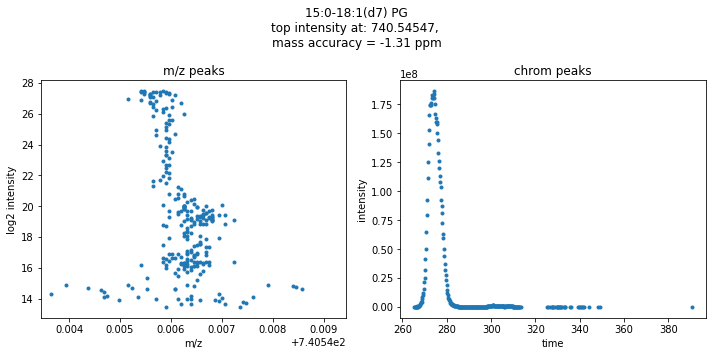

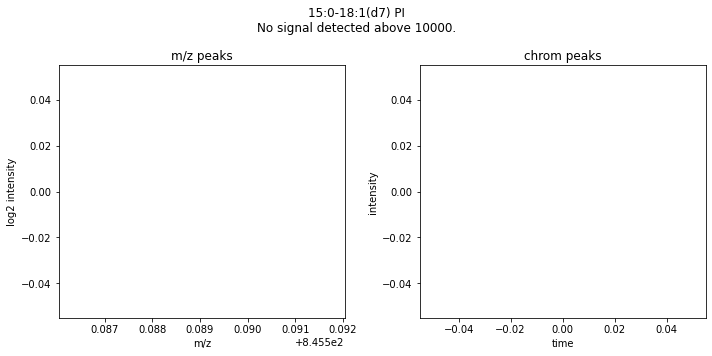

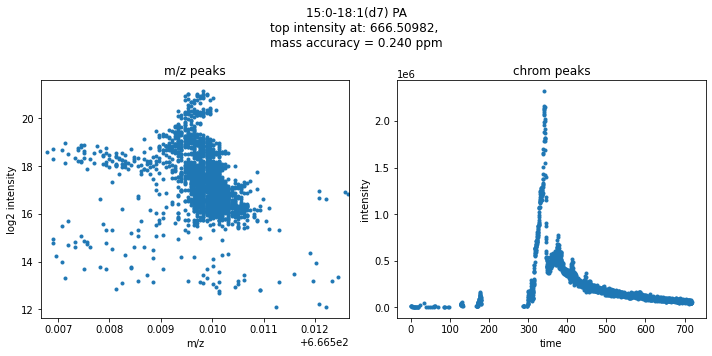

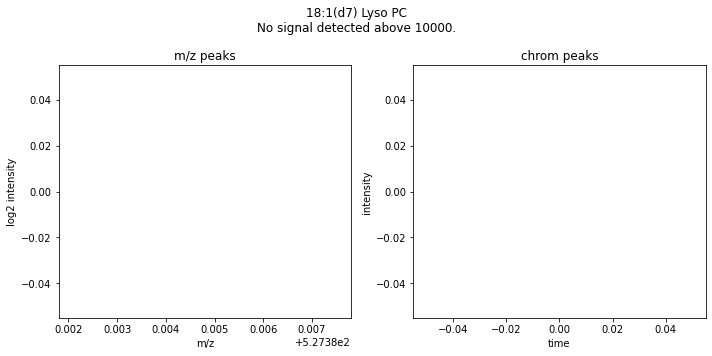

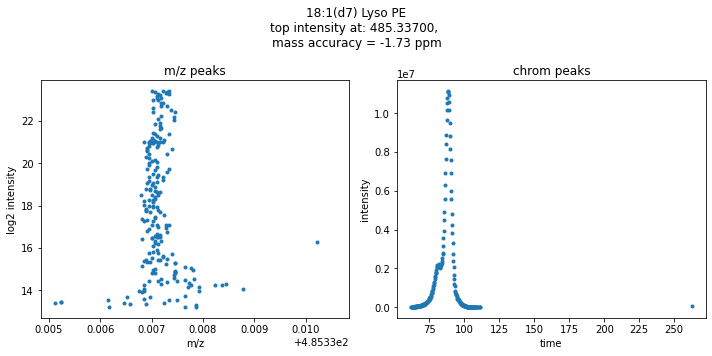

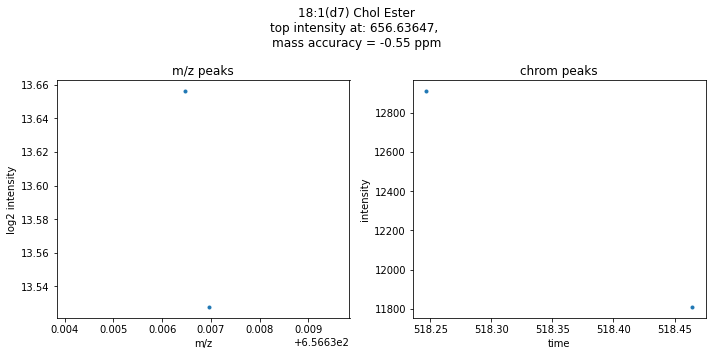

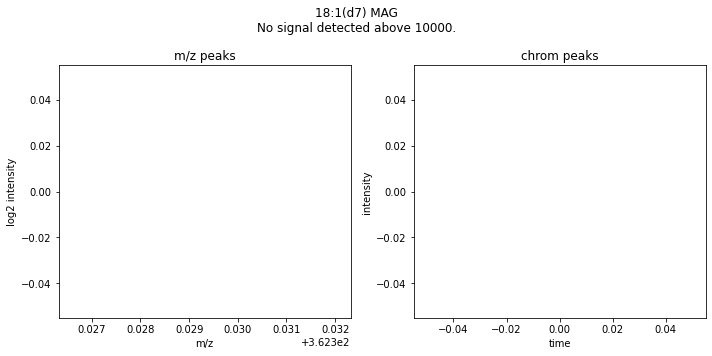

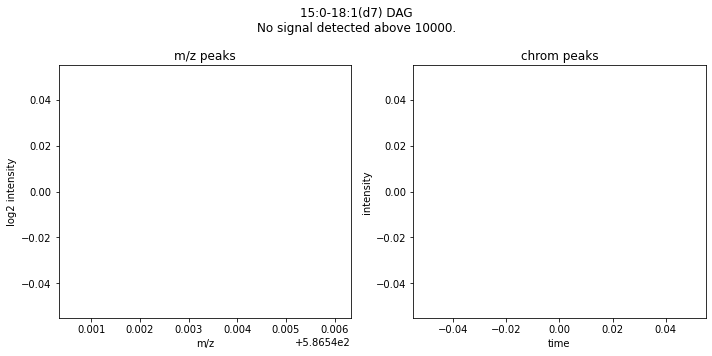

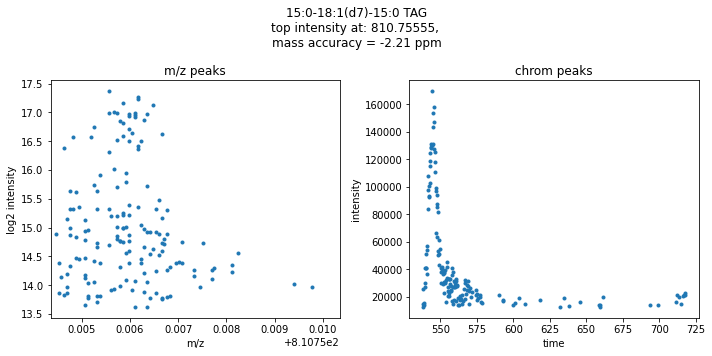

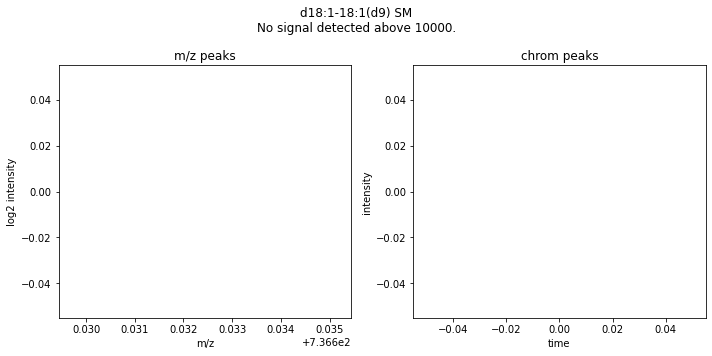

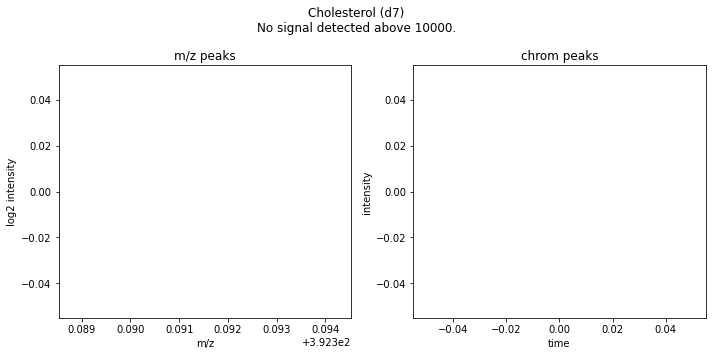

In [8]:
# full plot
file = '../../../raw_mzML/RPneg_mzML/MT_20230308_020.mzML'
plot_file(file, spikeins + other_controls)

# Summary

This provides proto code for QC per data file.

The notebook can be saved to HTML to serve as a report.

To-do next:

1. to refactor to a standalone program, so that this is run wthout human intervention.

2. to continue onto QC using multiple QC samples and batch files.


------

------

------

# Plot multiple files of TIC

In [40]:
meta_df.head(20)

,Sample Type,File Name,Sample ID,Sample_ID_upd,group,Comment,Path,Instrument Method,Process Method,Position,Inj Vol
0,Blank,Blank_20230308_002,Blank_20230308_002,Blank_1,Blank,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylser...,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM...,NaN,G:A1,2
1,Blank,Blank_20230308_004,Blank_20230308_004,Blank_2,Blank,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylser...,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM...,NaN,G:A1,2
2,Blank,Blank_std_20230308_1_002,Blank_std_20230308_002,Blank_std_1,Blank_std,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylser...,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM...,NaN,G:A2,2
3,QC,MT_20230308_002,Qstd_20230308_002,Qstd_1,Qstd,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylser...,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM...,NaN,G:A3,2
4,QC,MT_20230308_004,Qstd_20230308_004,Qstd_2,Qstd,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylser...,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM...,NaN,G:A3,2
5,Unknown,MT_20230308_006,pooledsample_02,pooled_1,pooled,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylser...,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM...,NaN,G:A4,5
6,Unknown,MT_20230308_008,Naive_250k_01_02,Tn_250K_1,Tn,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylser...,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM...,NaN,G:B1,5
7,Unknown,MT_20230308_010,Naive_250k_02_02,Tn_250K_2,Tn,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylser...,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM...,NaN,G:B2,5
8,Unknown,MT_20230308_012,Naive_750k_01_02,Tn_750K_3,Tn,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylser...,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM...,NaN,G:B3,5
9,Unknown,MT_20230308_014,Naive_750k_02_02,Tn_750K_4,Tn,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylser...,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM...,NaN,G:B4,5


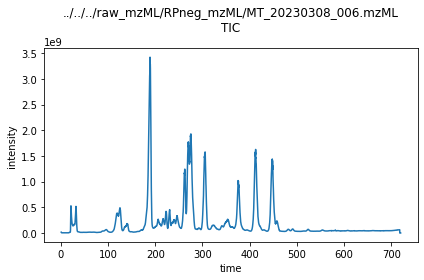

In [42]:
# pooled samples
plot_TIC_per_file('../../../raw_mzML/RPneg_mzML/MT_20230308_006.mzML')

------

In [83]:
import os
import re
import pandas as pd

In [84]:
meta_df_path = "../../../seq/RPneg_addgrp.csv"

In [85]:
meta_df = pd.read_csv(meta_df_path);meta_df.head()

,Sample Type,File Name,Sample ID,Sample_ID_upd,cell_number,group,Comment,Path,Instrument Method,Process Method,Position,Inj Vol
0,Blank,Blank_20230308_002,Blank_20230308_002,Blank_1,NR,Blank,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylser...,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM...,NaN,G:A1,2
1,Blank,Blank_20230308_004,Blank_20230308_004,Blank_2,NR,Blank,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylser...,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM...,NaN,G:A1,2
2,Blank,Blank_std_20230308_1_002,Blank_std_20230308_002,Blank_std_1,NR,Blank_std,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylser...,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM...,NaN,G:A2,2
3,QC,MT_20230308_002,Qstd_20230308_002,Qstd_1,NR,Qstd,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylser...,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM...,NaN,G:A3,2
4,QC,MT_20230308_004,Qstd_20230308_004,Qstd_2,NR,Qstd,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylser...,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM...,NaN,G:A3,2


In [86]:
set(meta_df['group'])

{'Blank', 'Blank_std', 'CD8TD', 'CD8stem', 'CD8trans', 'Qstd', 'Tn', 'pooled'}

In [112]:
color_dict = {'Blank':'#888888',
              'Tn':'#008000',
              'CD8stem':'#0000ff',
              'CD8trans':'#ffff00',
              'CD8TD': '#ff0000'}

In [113]:
input_raw_fdr = "../../../raw_mzML/RPneg_mzML/"

In [114]:
meta_df_sub = meta_df.loc[meta_df['group'].isin(['Blank','Tn','CD8stem','CD8trans','CD8TD'])]

In [119]:
meta_df_sub

,Sample Type,File Name,Sample ID,Sample_ID_upd,cell_number,group,Comment,Path,Instrument Method,Process Method,Position,Inj Vol
0,Blank,Blank_20230308_002,Blank_20230308_002,Blank_1,NR,Blank,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylser...,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM...,NaN,G:A1,2
1,Blank,Blank_20230308_004,Blank_20230308_004,Blank_2,NR,Blank,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylser...,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM...,NaN,G:A1,2
6,Unknown,MT_20230308_008,Naive_250k_01_02,Tn_250K_1,250000,Tn,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylser...,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM...,NaN,G:B1,5
7,Unknown,MT_20230308_010,Naive_250k_02_02,Tn_250K_2,250000,Tn,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylser...,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM...,NaN,G:B2,5
8,Unknown,MT_20230308_012,Naive_750k_01_02,Tn_750K_3,750000,Tn,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylser...,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM...,NaN,G:B3,5
9,Unknown,MT_20230308_014,Naive_750k_02_02,Tn_750K_4,750000,Tn,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylser...,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM...,NaN,G:B4,5
10,Unknown,MT_20230308_016,CD8T_stem_250k_01_02,CD8stem_250K_1,250000,CD8stem,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylser...,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM...,NaN,G:B5,5
11,Unknown,MT_20230308_018,CD8T_stem_300k_01_02,CD8stem_300K_2,300000,CD8stem,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylser...,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM...,NaN,G:B6,5
13,Unknown,MT_20230308_022,CD8T_trans_350k_01_02,CD8trans_350K_1,350000,CD8trans,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylser...,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM...,NaN,G:B7,5
14,Unknown,MT_20230308_024,CD8T_trans_250k_01_02,CD8trans_250K_2,250000,CD8trans,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylser...,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM...,NaN,G:B8,5


In [122]:
file_dict = {}
for i,row in meta_df_sub.iterrows():
    file_dict[row['Sample_ID_upd']] = {
        'file_path':os.path.join(input_raw_fdr,row['File Name']+ '.mzML'),
        'color': color_dict[row['group']],
        'group': row['group'],
        'cell_number': row['cell_number']
    }

In [177]:
def plot_TIC_multifile_v2(file_dict, fig_path = "", label_col = 'group'):
    '''
    Example of file_dict
    ====================
    {sampleID: {file_path: "path2mzML",
                color: "green",
                group: "HEU"}
                ...
                }
    '''
    
    fig, ax = plt.subplots()
    fig_dict = {}
    for k,v in file_dict.items():
        
        exp = MSExperiment()
        MzMLFile().load(v['file_path'], exp)
        # do TIC
        retention_times, intensities = calcTIC(exp)
        
        if v[label_col] not in fig_dict:
            fig_dict[v[label_col]] = True
            line, = ax.plot(retention_times, intensities, color= v['color'], linewidth = 0.5,alpha = 0.5, label=v[label_col])
        else:
            ax.plot(retention_times, intensities, color= v['color'], linewidth = 0.5,alpha = 0.8)
        
    ax.set_title('multiple files TIC')
    ax.set_xlabel('time')
    ax.set_ylabel('intensity')
    ax.legend(loc=0, frameon=False)  # create the legend
    fig.tight_layout()
    
    if len(fig_path) != 0:
        fig.savefig(fig_path, dpi=600)  # save the figure with higher dpi
    fig.show()

# all critical TIC

/var/folders/vw/wq572pm129ddch9_12s00kw1glkwmw/T/ipykernel_68533/1840506646.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


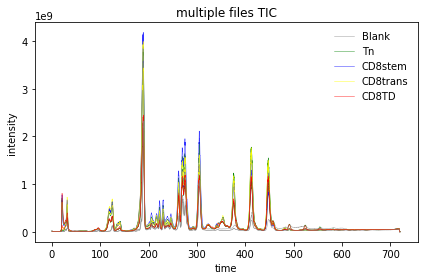

In [125]:
plot_TIC_multifile_v2(file_dict, fig_path = "./archive/all_critical.png", label_col = 'group')

## Using only critical cells 

----

## using cell numbers as group

In [127]:
set(meta_df_sub['cell_number'])

{'250000', '300000', '350000', '750000', 'NR'}

In [128]:
color_dict2 = {'NR':'#000000',
              '250000':'#008000',
              '300000':'#0000ff',
              '350000':'#FFA500',
              '750000': '#ff0000'}

In [129]:
file_dict2 = {}
for i,row in meta_df_sub.iterrows():
    file_dict2[row['Sample_ID_upd']] = {
        'file_path':os.path.join(input_raw_fdr,row['File Name']+ '.mzML'),
        'color': color_dict2[row['cell_number']],
        'group': row['group'],
        'cell_number': row['cell_number']
    }

/var/folders/vw/wq572pm129ddch9_12s00kw1glkwmw/T/ipykernel_68533/1840506646.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


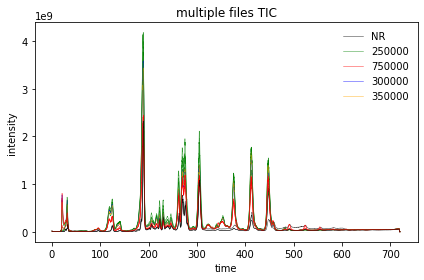

In [130]:
plot_TIC_multifile_v2(file_dict2, fig_path = "./archive/all_critical_cell_number.png", label_col = 'cell_number')

## Tn TIC

In [174]:
Tn_dict = {k:v for k,v in file_dict.items() if v['group'] == 'Tn'}

In [175]:
upd_Tn_dict = {'Naive_250k_01_02': {'file_path': '../../../raw_mzML/RPneg_mzML/MT_20230308_008.mzML',
  'color': '#000088',
  'group': 'Tn-250-1'},
 'Naive_250k_02_02': {'file_path': '../../../raw_mzML/RPneg_mzML/MT_20230308_010.mzML',
  'color': '#0000ff',
  'group': 'Tn-250-2'},
 'Naive_750k_01_02': {'file_path': '../../../raw_mzML/RPneg_mzML/MT_20230308_012.mzML',
  'color': '#880000',
  'group': 'Tn-750-1'},
 'Naive_750k_02_02': {'file_path': '../../../raw_mzML/RPneg_mzML/MT_20230308_014.mzML',
  'color': '#ff0000',
  'group': 'Tn-750-2'}}

/var/folders/vw/wq572pm129ddch9_12s00kw1glkwmw/T/ipykernel_68533/1840506646.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


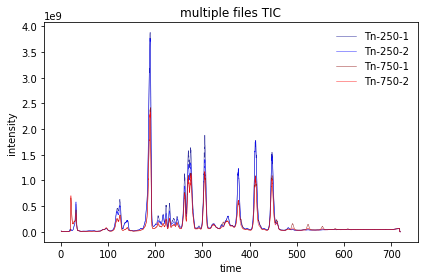

In [176]:
plot_TIC_multifile_v2(upd_Tn_dict, fig_path = "./archive/Tn.pdf")

------

## CD8stem TIC

In [145]:
stem_dict = {k:v for k,v in file_dict.items() if v['group'] == 'CD8stem'}

In [146]:
stem_dict

{'CD8stem_250K_1': {'file_path': '../../../raw_mzML/RPneg_mzML/MT_20230308_016.mzML',
  'color': '#0000ff',
  'group': 'CD8stem',
  'cell_number': '250000'},
 'CD8stem_300K_2': {'file_path': '../../../raw_mzML/RPneg_mzML/MT_20230308_018.mzML',
  'color': '#0000ff',
  'group': 'CD8stem',
  'cell_number': '300000'}}

In [151]:
upd_stem_dict = {'CD8stem_250K_1': {'file_path': '../../../raw_mzML/RPneg_mzML/MT_20230308_016.mzML',
  'color': '#0000ff',
  'group': 'CD8stem-250000-1',
  'cell_number': '250000'},
 'CD8stem_300K_2': {'file_path': '../../../raw_mzML/RPneg_mzML/MT_20230308_018.mzML',
  'color': '#000088',
  'group': 'CD8stem-300000-2',
  'cell_number': '300000'}}

/var/folders/vw/wq572pm129ddch9_12s00kw1glkwmw/T/ipykernel_68533/1840506646.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


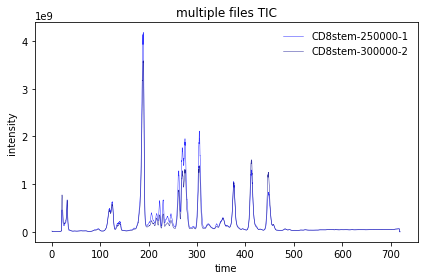

In [152]:
plot_TIC_multifile_v2(upd_stem_dict, fig_path = "./archive/CD8stem.pdf")

-----

## CD8trans TIC

In [157]:
trans_dict = {k:v for k,v in file_dict.items() if v['group'] == 'CD8trans'}

In [158]:
trans_dict

{'CD8trans_350K_1': {'file_path': '../../../raw_mzML/RPneg_mzML/MT_20230308_022.mzML',
  'color': '#ffff00',
  'group': 'CD8trans',
  'cell_number': '350000'},
 'CD8trans_250K_2': {'file_path': '../../../raw_mzML/RPneg_mzML/MT_20230308_024.mzML',
  'color': '#ffff00',
  'group': 'CD8trans',
  'cell_number': '250000'}}

In [159]:
upd_trans_dict = {'CD8trans_350K_1': {'file_path': '../../../raw_mzML/RPneg_mzML/MT_20230308_022.mzML',
  'color': '#008800',
  'group': 'CD8trans-350000-1',
  'cell_number': '350000'},
 'CD8trans_250K_2': {'file_path': '../../../raw_mzML/RPneg_mzML/MT_20230308_024.mzML',
  'color': '#00ff00',
  'group': 'CD8trans-250000-2',
  'cell_number': '250000'}}

/var/folders/vw/wq572pm129ddch9_12s00kw1glkwmw/T/ipykernel_68533/1840506646.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


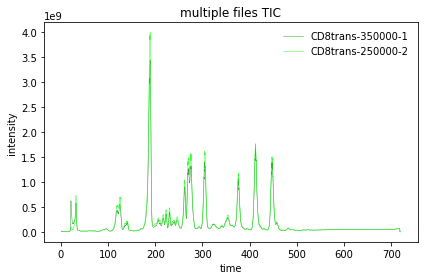

In [160]:
plot_TIC_multifile_v2(upd_trans_dict, fig_path = "./archive/CD8trans.pdf")

-----

## TD TIC

In [163]:
TD_dict = {k:v for k,v in file_dict.items() if v['group'] == 'CD8TD'}

In [164]:
TD_dict

{'CD8TD_750K_1': {'file_path': '../../../raw_mzML/RPneg_mzML/MT_20230308_026.mzML',
  'color': '#ff0000',
  'group': 'CD8TD',
  'cell_number': '750000'},
 'CD8TD_750K_2': {'file_path': '../../../raw_mzML/RPneg_mzML/MT_20230308_028.mzML',
  'color': '#ff0000',
  'group': 'CD8TD',
  'cell_number': '750000'}}

In [165]:
upd_TD_dict = {'CD8TD_750K_1': {'file_path': '../../../raw_mzML/RPneg_mzML/MT_20230308_026.mzML',
  'color': '#ff0000',
  'group': 'CD8TD-750000-1',
  'cell_number': '750000'},
 'CD8TD_750K_2': {'file_path': '../../../raw_mzML/RPneg_mzML/MT_20230308_028.mzML',
  'color': '#880000',
  'group': 'CD8TD-750000-2',
  'cell_number': '750000'}}

/var/folders/vw/wq572pm129ddch9_12s00kw1glkwmw/T/ipykernel_68533/1840506646.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


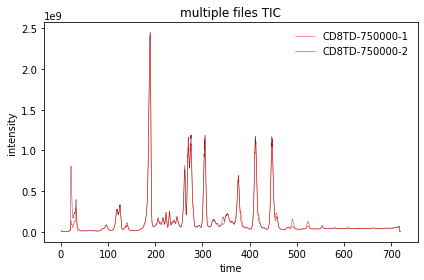

In [166]:
plot_TIC_multifile_v2(upd_TD_dict, fig_path = "./archive/CD8TD.pdf")

------

-----

## TD_Tn 750000 TIC

In [168]:
TD_Tn_dict = {k:v for k,v in file_dict.items() if v['group'] in ['CD8TD','Tn']}

In [169]:
TD_Tn_dict

{'Tn_250K_1': {'file_path': '../../../raw_mzML/RPneg_mzML/MT_20230308_008.mzML',
  'color': '#008000',
  'group': 'Tn',
  'cell_number': '250000'},
 'Tn_250K_2': {'file_path': '../../../raw_mzML/RPneg_mzML/MT_20230308_010.mzML',
  'color': '#008000',
  'group': 'Tn',
  'cell_number': '250000'},
 'Tn_750K_3': {'file_path': '../../../raw_mzML/RPneg_mzML/MT_20230308_012.mzML',
  'color': '#008000',
  'group': 'Tn',
  'cell_number': '750000'},
 'Tn_750K_4': {'file_path': '../../../raw_mzML/RPneg_mzML/MT_20230308_014.mzML',
  'color': '#008000',
  'group': 'Tn',
  'cell_number': '750000'},
 'CD8TD_750K_1': {'file_path': '../../../raw_mzML/RPneg_mzML/MT_20230308_026.mzML',
  'color': '#ff0000',
  'group': 'CD8TD',
  'cell_number': '750000'},
 'CD8TD_750K_2': {'file_path': '../../../raw_mzML/RPneg_mzML/MT_20230308_028.mzML',
  'color': '#ff0000',
  'group': 'CD8TD',
  'cell_number': '750000'}}

In [172]:
upd_TD_Tn_dict = {'Tn_250K_1': {'file_path': '../../../raw_mzML/RPneg_mzML/MT_20230308_008.mzML',
  'color': '#008800',
  'group': 'Tn-250000-1',
  'cell_number': '250000'},
 'Tn_250K_2': {'file_path': '../../../raw_mzML/RPneg_mzML/MT_20230308_010.mzML',
  'color': '#00ff00',
  'group': 'Tn-250000-2',
  'cell_number': '250000'},
 'Tn_750K_3': {'file_path': '../../../raw_mzML/RPneg_mzML/MT_20230308_012.mzML',
  'color': '#0000ff',
  'group': 'Tn-750000-1',
  'cell_number': '750000'},
 'Tn_750K_4': {'file_path': '../../../raw_mzML/RPneg_mzML/MT_20230308_014.mzML',
  'color': '#000088',
  'group': 'Tn-750000-2',
  'cell_number': '750000'},
 'CD8TD_750K_1': {'file_path': '../../../raw_mzML/RPneg_mzML/MT_20230308_026.mzML',
  'color': '#ff0000',
  'group': 'CD8TD-750000-1',
  'cell_number': '750000'},
 'CD8TD_750K_2': {'file_path': '../../../raw_mzML/RPneg_mzML/MT_20230308_028.mzML',
  'color': '#880000',
  'group': 'CD8TD-750000-2',
  'cell_number': '750000'}}

/var/folders/vw/wq572pm129ddch9_12s00kw1glkwmw/T/ipykernel_68533/1064185259.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


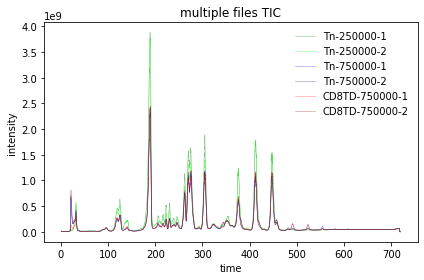

In [178]:
plot_TIC_multifile_v2(upd_TD_Tn_dict, fig_path = "./archive/CD8TD&Tn-see-750K-cells-similarity.pdf")

--------

### RT examination
- This does reflect systematic Retention time shift between samples. It will be better to perform analyses between batches with group randomized evenly across batches

------